
## Atividade Prática: Pré-processamento de Dados e Regressão Linear Múltipla
Prepare uma apresentação com o passo a passo e os resultados.

### Objetivo

Aplicar técnicas de pré-processamento de dados e construir um modelo de regressão linear múltipla para prever uma variável dependente com base em múltiplas variáveis independentes. Após concluida a construção do modelo realize uma apresentação para apresentar o passo a passo e os resultados encontrados. [link text](https://)

###  Conjunto de Dados
Escolha um dataset dos fornecidos abaixo e realize cada uma das etapas para a regressão multipla

1. **Desempenho de Estudantes**

   * **Descrição**: Contém registros de 10.000 estudantes, incluindo variáveis como horas de estudo, participação em aulas, atividades extracurriculares e um índice de desempenho.
   * **Link**: [Kaggle: Student Performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

2. **Previsão de Preços de Carros**

   * **Descrição**: Inclui informações sobre veículos, como ano de fabricação, quilometragem, tipo de combustível e preço de venda, ideal para modelos de regressão.
   * **Link**: [Kaggle: Car Price Prediction](https://www.kaggle.com/datasets/erolmasimov/price-prediction-multiple-linear-regression)

3. **Campanha de Marketing**

   * **Descrição**: Dados de um experimento de marketing com 200 observações, relacionando orçamento em mídias sociais e vendas, útil para analisar o impacto de investimentos em publicidade.
   * **Link**: [Kaggle: Marketing Campaign](https://www.kaggle.com/datasets/fayejavad/marketing-linear-multiple-regression)

4. **Estudo de Caso de Habitação**

   * **Descrição**: Conjunto de dados sobre vendas de casas no condado de King, EUA, com variáveis como tamanho, número de quartos e localização, adequado para prever preços de imóveis.
   * **Link**: [Kaggle: King County Housing](https://www.kaggle.com/code/divan0/multiple-linear-regression)

5. **Conjunto de Dados Econômicos**

   * **Descrição**: Dados relacionados a variáveis econômicas, como PIB, taxa de desemprego e inflação, permitindo análises de regressão em contextos macroeconômicos.
   * **Link**: [GitHub: Economics Dataset](https://github.com/krishnaik06/Complete-Machine-Learning-2023/blob/main/Multiple%20Linear%20Regression-%20Economics%20Dataset.ipynb)


### Etapas da Atividade



#### 1. **Importação e Exploração dos Dados**

* Carregue o conjunto de dados usando o pandas.
* Visualize as primeiras linhas para entender a estrutura.
* Utilize métodos como `.info()`, `.describe()` e `.isnull().sum()` para obter informações sobre os dados.
* Faça um analise preliminar dos dados, expliqye os principais insgihts .

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('scrap price.csv')
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [78]:
df.isnull().sum()[df.isnull().sum() > 0] #somente colunas com valores nulos

Series([], dtype: int64)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [80]:
df.duplicated().sum()#verifica se existem duplicatas

0

#### 2. **Tratamento de Dados Faltantes**

* Identifique colunas com valores ausentes.
* Decida estratégias para lidar com esses valores:

  * Remoção de linhas ou colunas.
  * Imputação com média, mediana ou moda.
  * Imputação utilizando modelos preditivos.

In [81]:
# Não  existem valores ausentes nesse dataset



#### 3. **Tratamento de Variáveis Categóricas**

* Identifique variáveis categóricas.
* Aplique técnicas de codificação:

  * Codificação One-Hot (dummificação) para variáveis nominais.
  * Codificação ordinal para variáveis com ordem intrínseca.

In [82]:
#colunas categoricas ; fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype(n sei ao certo)
#cylindernumber,fuelsystem(n sei ao certo),

cols = ['fueltypes','aspiration','carbody','drivewheels','enginelocation','enginetype','cylindernumber','fuelsystem']
for col in cols:
    print(df[col].unique())

df = pd.get_dummies(df,columns=cols,drop_first=True)#teve que ser onehot, se não a eficacia do modelo pode ser prejudicada ,mesmo que isso signifique muitas colunas
                                                   #pelo uso de label encoder pode gerar hierarquia falsa
df.head()


['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


,ID,symboling,name,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,two,88.6,168.8,64.1,48.8,2548,130,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,two,88.6,168.8,64.1,48.8,2548,130,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,two,94.5,171.2,65.5,52.4,2823,152,...,False,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,four,99.8,176.6,66.2,54.3,2337,109,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,four,99.4,176.6,66.4,54.3,2824,136,...,False,False,False,False,False,False,False,True,False,False


#### 4. **Detecção e Tratamento de Outliers**

* Utilize visualizações como boxplots para identificar outliers.
* Explique os resultados
* Considere métodos para tratar outliers:

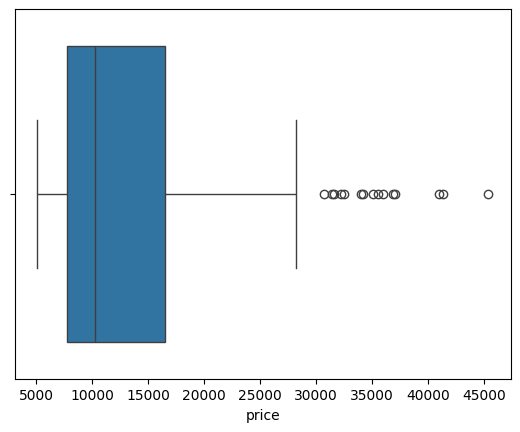

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])
plt.show()

Aqueles valores que estão na caixa central sao os dados representam dados q estao corretos
valores que estão fora dos bigodes sao outliers 
para tratar os outliers vamos utilizar o intervalo interquartil(iqr)

In [84]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

df = df[(df['price'] >= (q1 - 1.5 * iqr)) & (df['price'] <= (q3 + 1.5 * iqr))]

#### 5. **Normalização ou Padronização**

* Aplique técnicas de escalonamento para variáveis numéricas:

  * Normalização (Min-Max Scaling).
  * Padronização (Z-score).


In [85]:
from sklearn.preprocessing import StandardScaler

numericas = df.select_dtypes(include='number') #somente numericas
nao_numericas = df.select_dtypes(exclude='number')#somente não numericas


scaler = StandardScaler()
numericas_padronizadas = pd.DataFrame(scaler.fit_transform(numericas), columns=numericas.columns, index=df.index)#padronizando numericos


df = pd.concat([numericas_padronizadas, nao_numericas], axis=1) #junta novamente o dataset

### 6. **Analise de Correlação**

* Realize a analise de correlação com as diferentes variaveis e descreva quais devem ser utilizadas para realizar a predição

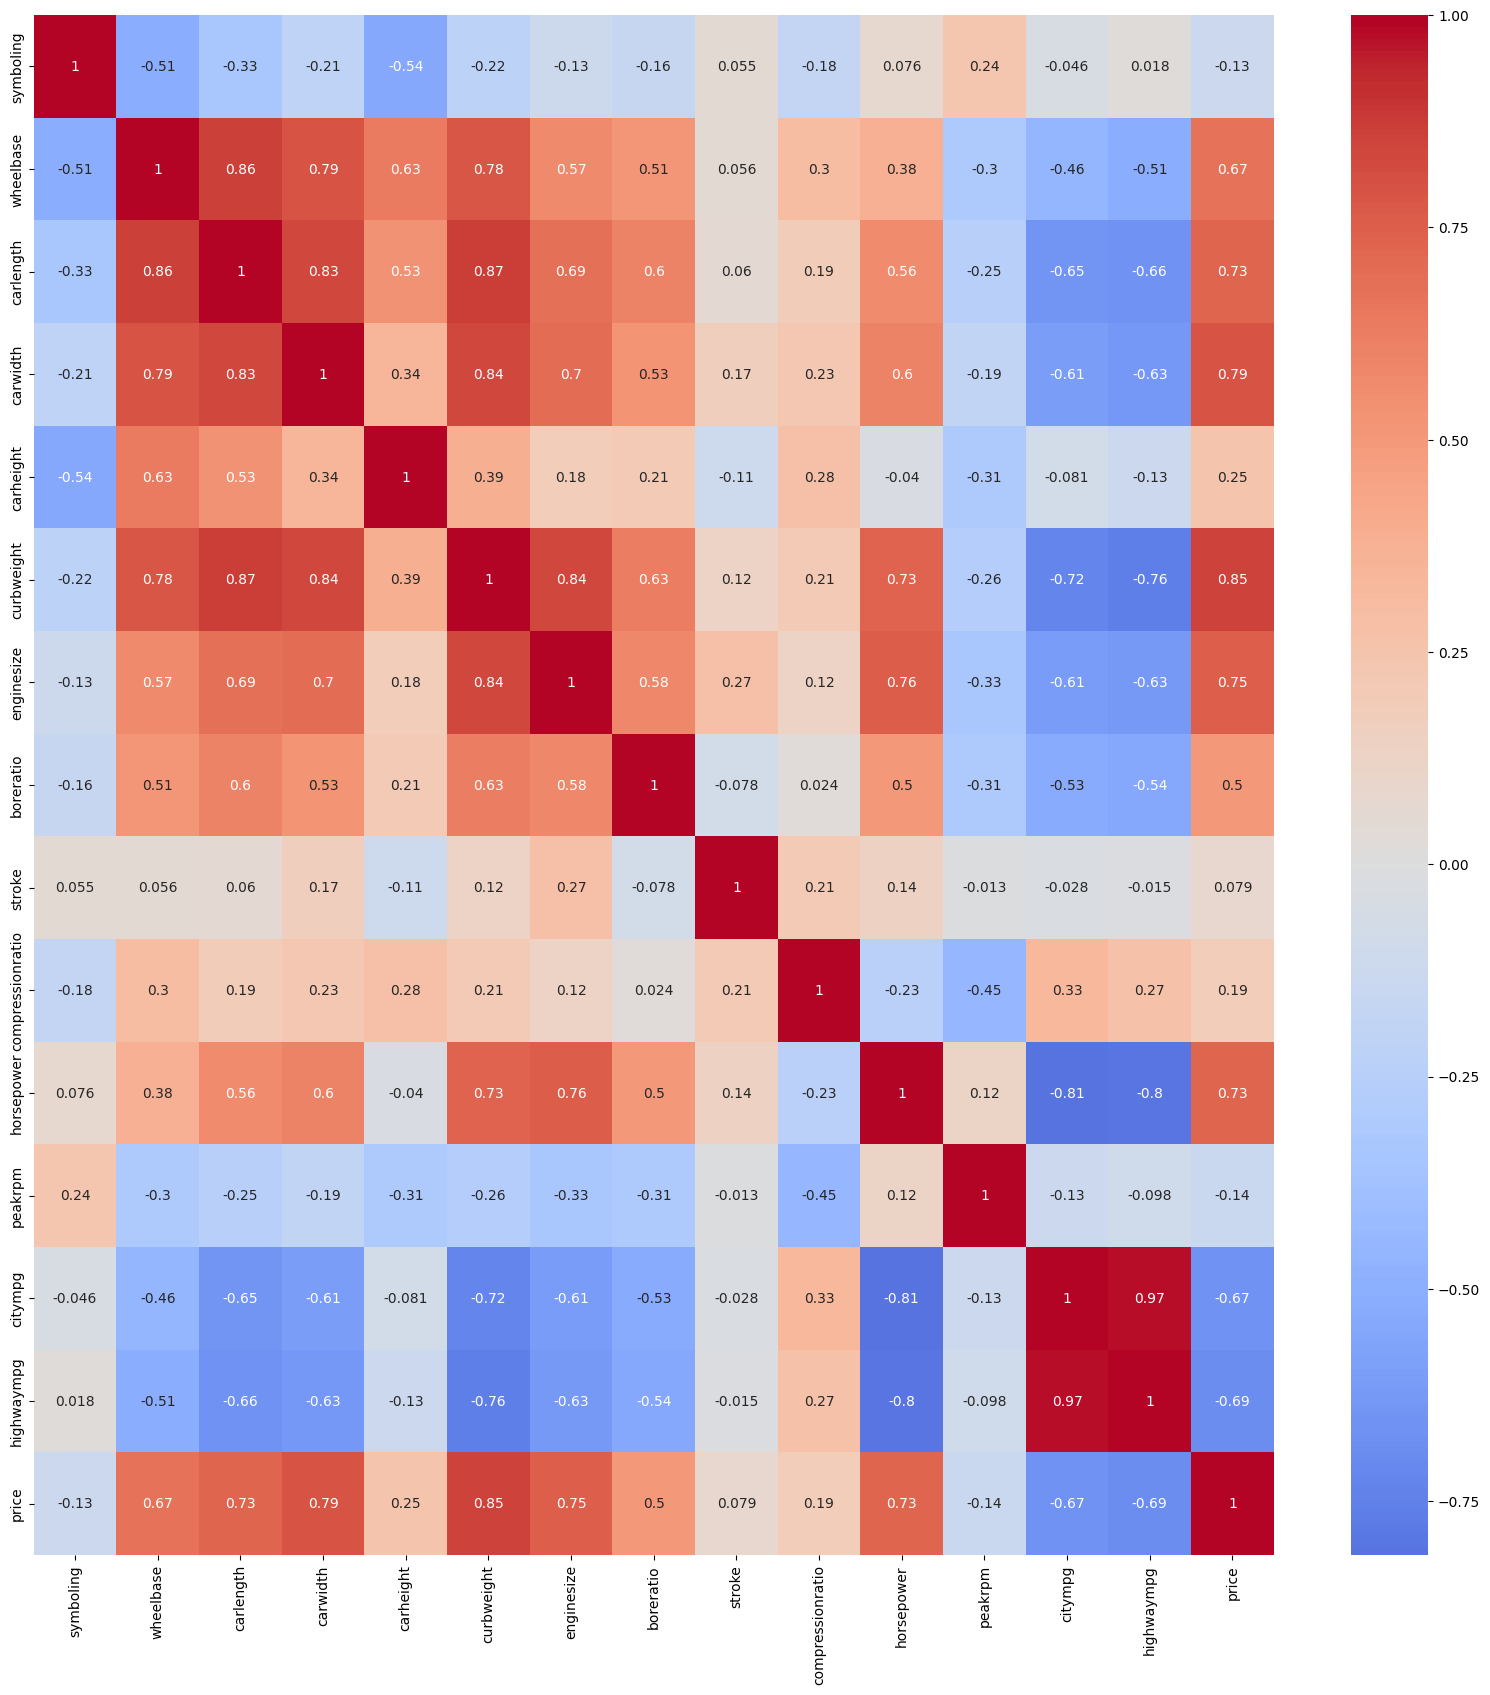

In [86]:
df.drop(columns=['ID'],inplace=True) #remove a coluna ID, pois não é relevante para o modelo
numericas = df.select_dtypes(include='number')
corr_pearson = numericas.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_pearson,annot=True,cmap='coolwarm',center=0)
plt.show()

In [87]:
numericas_final = df[['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','price']]

In [88]:
df = df.drop(columns=['name','doornumbers'])
nao_numericas = df.select_dtypes(exclude='number')#somente não numerica


In [89]:
df_final = pd.concat([numericas_final, nao_numericas], axis=1) #junta novamente o dataset


#### 6. **Divisão dos Dados**

* Separe os dados em conjuntos de treinamento e teste (por exemplo, 80% treinamento e 20% teste) utilizando `train_test_split` do scikit-learn.


In [90]:
from sklearn.model_selection import train_test_split;
X = df_final.drop(columns=['price'])
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 7. **Construção do Modelo de Regressão Linear Múltipla**

* Utilize o `LinearRegression` do scikit-learn para treinar o modelo com os dados de treinamento.


In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### 8. **Avaliação do Modelo**

* Avalie o desempenho do modelo utilizando métricas como:

  * R² (coeficiente de determinação).
  * RMSE (Root Mean Squared Error).
  * MAE (Mean Absolute Error).


In [92]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
MAE = mean_absolute_error( y_test,y_pred)
RMSE = np.sqrt(mean_squared_error( y_test,y_pred))
R2 = r2_score(y_test, y_pred)
print("R2 = {:0.2f}".format(R2))
print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

R2 = 0.83
MAE = 0.26
RMSE = 0.34


#### 9. **Interpretação dos Coeficientes**

* Analise os coeficientes do modelo para entender o impacto de cada variável independente na variável dependente.


34
34


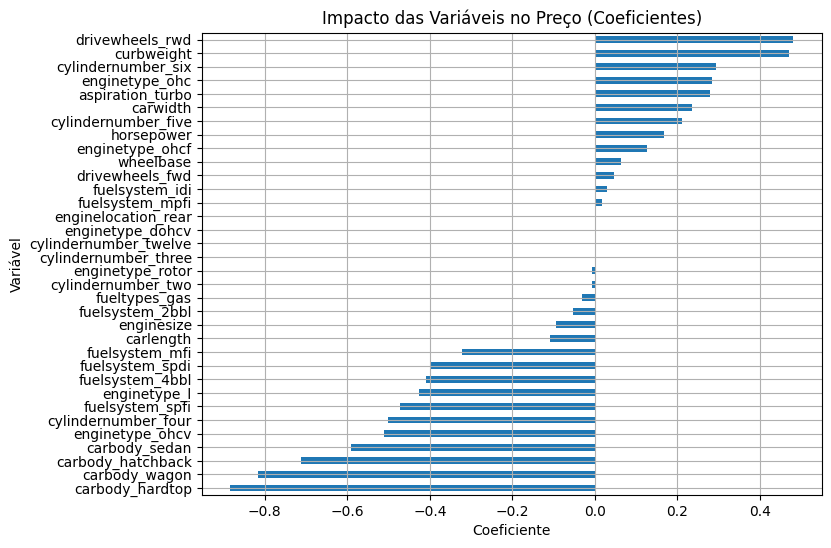

In [93]:
#R2 explica a variabilide do preço
#MAE é a média do erro absoluto,o quanto o modelo errou 
#RMSE é a raiz quadrada do erro médio quadrático, o quanto o modelo errou soque penaliza mais os erros maiores

print(len(regressor.coef_))
print(len(X.columns))
coeficientes = pd.Series(regressor.coef_, index=X.columns)

# Gráfico do impacto
coeficientes.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Impacto das Variáveis no Preço (Coeficientes)")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")
plt.grid(True)
plt.show()